In [7]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import joblib # for saving and loading variables
import os
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from pathlib import Path
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
base_folder = Path('C:/Users/ilkele4s/')

In [10]:
NewDirectory = 'SVM_stratifies_results'
#os.mkdir(os.path.join(base_folder,NewDirectory))
NewDirectory = os.path.join(base_folder,NewDirectory)

In [11]:
# load the data (samples only)

file_folder = 'C:' + '\\' + 'Users' + '\\' + 'ilkele4s' + '\\' + 'Downloads'
print(file_folder)

C:\Users\ilkele4s\Downloads


In [12]:
File = 'LSTM_data.csv'
file_path = os.path.join(file_folder,File)
print(file_path)

C:\Users\ilkele4s\Downloads\LSTM_data.csv


In [13]:

Data = pd.read_csv(file_path, header = None)

In [14]:
np.shape(Data)

(1440, 17400)

In [15]:
# create a label set

n_zones = 45
n_trials = 32

label_set = np.r_[1:n_zones+1]
labels = np.tile(label_set, 32)


In [16]:
print(labels[1:n_zones+1])

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45  1]


In [74]:
del samples

In [17]:
# merge samples and labels

Data[17400] = labels

In [18]:
# remove NAN values

Data.dropna(inplace=True)
Data = Data.reset_index()
del Data['index']

In [91]:
type(Data)

pandas.core.frame.DataFrame

In [94]:
samples = Data.drop(Data.columns[17400],axis = 1)

print(samples)

In [92]:
labels = Data[17400] 

In [102]:
print(Data.iloc([0, 1730]))

TypeError: unhashable type: 'list'

In [93]:
print(labels)

0       1
1       3
2       5
3       9
4      10
       ..
884    36
885    38
886    39
887    43
888    44
Name: 17400, Length: 889, dtype: int32


In [110]:
# train - test split

train_samples, test_samples, train_labels, test_labels = train_test_split(samples, labels, test_size=0.20, stratify=labels, random_state=42)

In [97]:
print(train_samples)

        0         1         2         3         4         5         6      \
380 -0.482160  0.262593 -0.179417  0.937205  0.649410  0.400422 -0.641129   
467 -0.915314 -0.623280 -0.864431 -0.592395  0.167782 -0.955602 -0.214112   
363 -0.926070  0.366419  0.053399 -0.501200 -0.684697 -0.356342 -0.059548   
615 -0.470044 -0.796984 -0.362175  0.272601  1.472363 -0.517949 -0.835099   
177  0.580865 -0.536500  0.536452 -0.211854  0.030667 -0.362519 -0.497018   
..        ...       ...       ...       ...       ...       ...       ...   
865  0.505247  0.235039 -0.137542  0.195882 -0.030440 -0.566492  0.446156   
618 -0.455035 -0.302336 -0.031470 -0.599800 -0.537404 -0.897884 -0.168164   
565  0.247652 -0.078719 -0.026126 -0.547006 -0.203987  0.032033 -0.265170   
650  0.958585 -0.510239 -0.749426 -0.586902 -0.658262 -0.027624 -0.604193   
566  1.216375  1.046975  2.498159  1.669864  0.024687  2.367082  0.885947   

        7         8         9      ...     17390     17391     17392  \
380

In [124]:
print(np.array(train_samples))

[[-4.82160231e-01  2.62592741e-01 -1.79417500e-01 ...  2.32214941e-02
  -8.22431790e-02 -8.24232095e-02]
 [-9.15314392e-01 -6.23279848e-01 -8.64430712e-01 ...  6.77491025e-03
  -1.42562142e-01 -1.41417279e-01]
 [-9.26069870e-01  3.66419101e-01  5.33987333e-02 ...  1.13757934e-01
  -2.98037762e-02 -2.95445723e-02]
 ...
 [ 2.47652080e-01 -7.87189605e-02 -2.61256030e-02 ...  9.66316151e-01
   7.69237663e+00  7.62637261e+00]
 [ 9.58585303e-01 -5.10239250e-01 -7.49426466e-01 ...  2.50075256e-01
  -1.45139801e-01 -1.42084760e-01]
 [ 1.21637459e+00  1.04697482e+00  2.49815892e+00 ... -3.28127590e-01
  -1.66555668e-01 -1.63550396e-01]]


In [125]:
train_samples_array = np.array(train_samples)

In [129]:
train_labels_array = np.array(train_labels)

In [128]:
np.shape(train_samples_array[1])

(17400,)

In [111]:
print(train_labels)

380    42
467    39
363    25
615    19
177    20
       ..
865     1
618    26
565     3
650    40
566     4
Name: 17400, Length: 711, dtype: int32


In [112]:
print(np.array(train_labels))

[42 39 25 19 20 29 12 22 40 30 37 36 20 36 36 41 32 29 30 12 32 29 30 21
 27 18 30 20  2  2 20 23 16  9 22 45 42 12 20 24 10 38  7  5  4 19 27 18
 23  4 27 28 16 34 27 44 43 13 29 23  3  5 32 27 23 41 11  4 32  8 16 37
 24  6 11  5 39 13 32 16 32 18 24  8  2 16 39 11  5 34 44 27 41 36 42 34
 33 34 31 14 32 32 26 17  3 28 42 32  3  4 11 44  2 33 31 21  7 35 25 35
  7 42  8  6 31 33  6 15 14  5 14 35 17  5 17  9 17 16  1 34 28 39 14 31
 18 34 31 34 12 40 12 13 28  6  6  4 11 31 22 15  5 26 38  3 27 39 30 40
  7  7 22  2 37 25 29 33 29 45  9 45 18 44 14 17 18 28 14  2 43 30 39 25
 29 21 15 22 45 12 25 11 13 35 19 27 36 38 35 28 12 20 13 44 38 31  4 45
 15 13 42 17 34 31  9 13 18  1 22 36 14 30  2  4  2 14 32 28 27 31  5  8
 15 10 20 43 40 22  3  7 34 30 41 40  5 26  3 42  7 40 28 38 38 15 16 13
 15 45  1  1 18 31 14 24 28 23  4 20 23 26  6 18  4 15 24 17 36  2  8 13
 15 30 13  1  6 12 23  3  8 10  6 10 25 17 42 38 25 35 43  8 30 26  6  7
 27 22 39 35 28 41 38 44 44  4 16 21 16 26 36 43 12

(array([ 0., 18., 17., 16., 14., 14., 16., 16., 17., 16., 15., 14., 15.,
        17., 18., 17., 15., 15., 14., 17., 17., 16., 16., 14., 15., 15.,
        17., 18., 17., 14., 15., 14., 16., 18., 18., 17., 15., 14., 16.,
        17., 17., 16., 14., 14., 14., 16.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
        21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5,
        32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5,
        43.5, 44.5, 45.5]),
 <BarContainer object of 46 artists>)

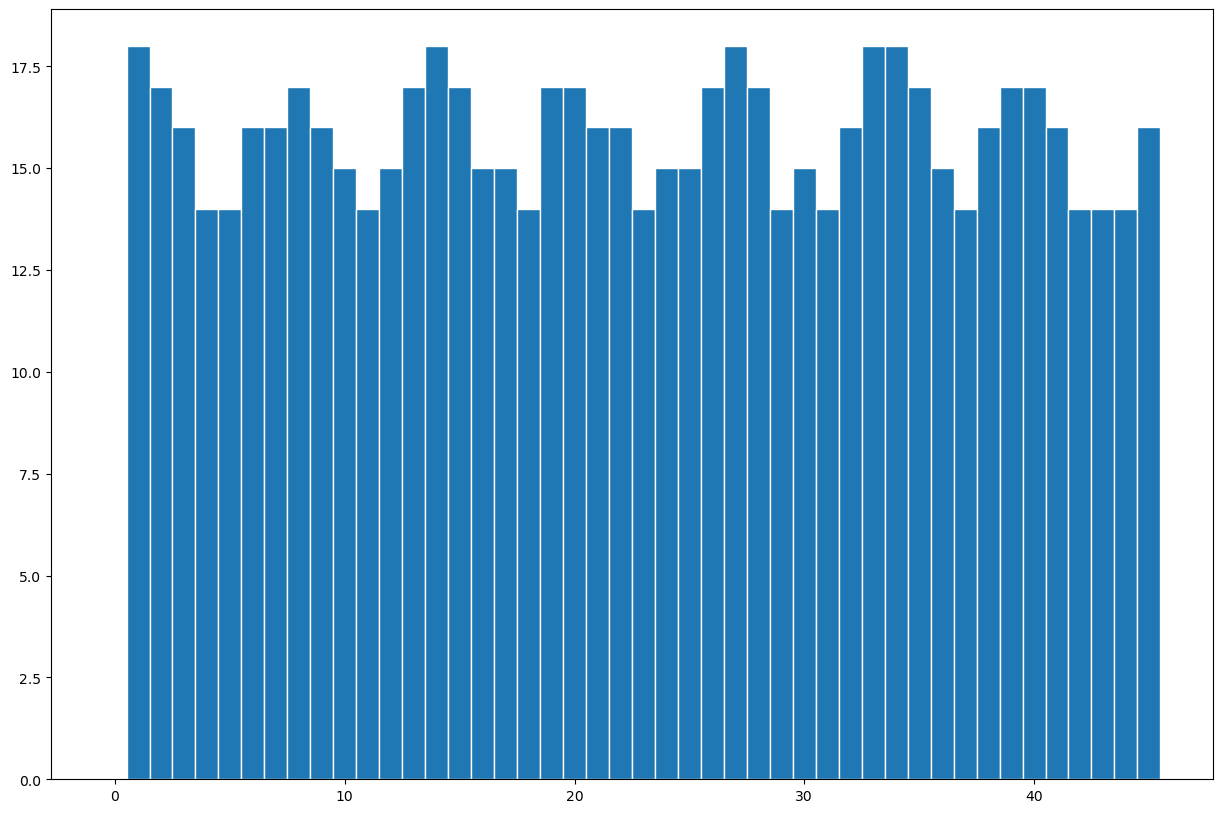

In [133]:
plt.figure(figsize=(15, 10))
plt.hist(train_labels, bins=np.arange(47) - 0.5, linewidth=1, edgecolor="white")

(array([0., 5., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 5., 4., 4.,
        4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 3., 3., 4., 5.,
        4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
        21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5,
        32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5,
        43.5, 44.5, 45.5]),
 <BarContainer object of 46 artists>)

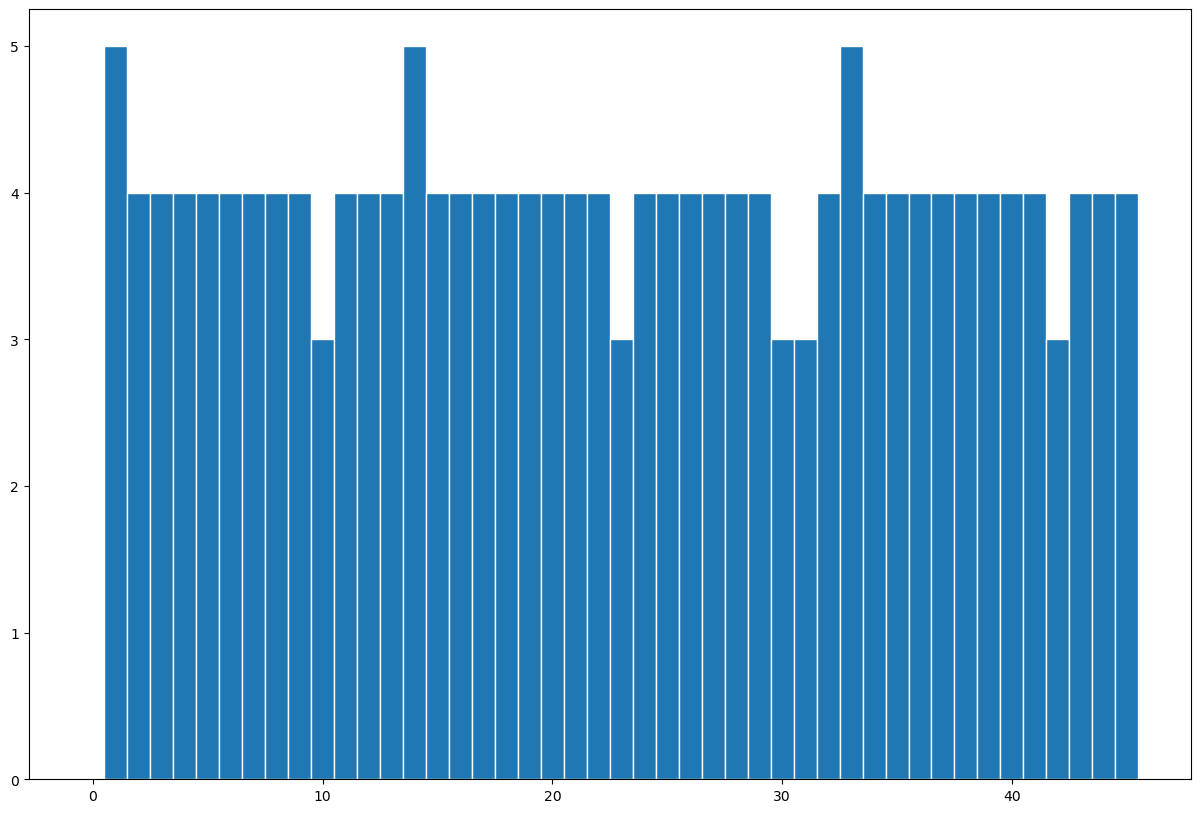

In [132]:
plt.figure(figsize=(15, 10))
plt.hist(test_labels, bins=np.arange(47) - 0.5, linewidth=1, edgecolor="white")

In [49]:
joblib.dump(train_samples_array, os.path.join(NewDirectory,'train_samples.sav'))
joblib.dump(train_labels_array, os.path.join(NewDirectory,'train_labels.sav'))

joblib.dump(test_samples_array, os.path.join(NewDirectory,'test_samples.sav'))
joblib.dump(test_labels_array, os.path.join(NewDirectory,'test_labels.sav'))

['C:\\Users\\ilkele4s\\SVM_comp_results\\test_labels.sav']

In [130]:
# model training with default parameters

svm_model_base = svm.SVC()
svm_model_base.fit(train_samples_array,train_labels_array)

SVC()

In [115]:
# predictions with

prediction_base = svm_model_base.predict(test_samples)

In [52]:
joblib.dump(prediction_base, os.path.join(NewDirectory,'base_prediction.sav'))

['C:\\Users\\ilkele4s\\SVM_comp_results\\base_prediction.sav']

In [27]:
# creating grid

param_grid = [{'class_weight': [None, 'balanced'], 'C':[0.5, 1, 10, 100], 'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear','rbf'], 'decision_function_shape': ['ovo','ovr']}]

In [29]:
# grid search


optimal_params = GridSearchCV(svm.SVC(), param_grid, cv=3, scoring='accuracy', verbose=0)

optimization = optimal_params.fit(train_samples_array, train_labels_array)


In [55]:
print(optimal_params.best_params_)

{'C': 1, 'class_weight': None, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}


In [56]:
joblib.dump(optimal_params.best_params_, os.path.join(NewDirectory,'best_params.sav'))

['C:\\Users\\ilkele4s\\SVM_comp_results\\best_params.sav']

In [57]:
dict_string = "\n".join([f"{key}: {value}" for key, value in optimal_params.best_params_.items()])

In [58]:
file = open(os.path.join(NewDirectory,'best_params.txt'), 'w')
# Write content to the file
file.write(dict_string)

73

In [59]:
# getting optimal values for the parameters

C_ = optimal_params.best_params_.get('C')
dfs_ = optimal_params.best_params_.get('decision_function_shape')
gamma_ = optimal_params.best_params_.get('gamma')
kernel_ = optimal_params.best_params_.get('kernel')
weight_ = optimal_params.best_params_.get('class_weight')

In [60]:
# train the model with the optimal values
svm_model_optimized = svm.SVC(C=C_, class_weight=weight_, decision_function_shape=dfs_, gamma=gamma_, kernel=kernel_)
svm_model_optimized.fit(train_samples_array,train_labels_array)

SVC(C=1, decision_function_shape='ovo', gamma=1)

In [61]:
prediction_optimized = svm_model_optimized.predict(test_samples_array)

In [62]:
joblib.dump(prediction_optimized, os.path.join(NewDirectory,'optimized_prediction.sav'))

['C:\\Users\\ilkele4s\\SVM_comp_results\\optimized_prediction.sav']

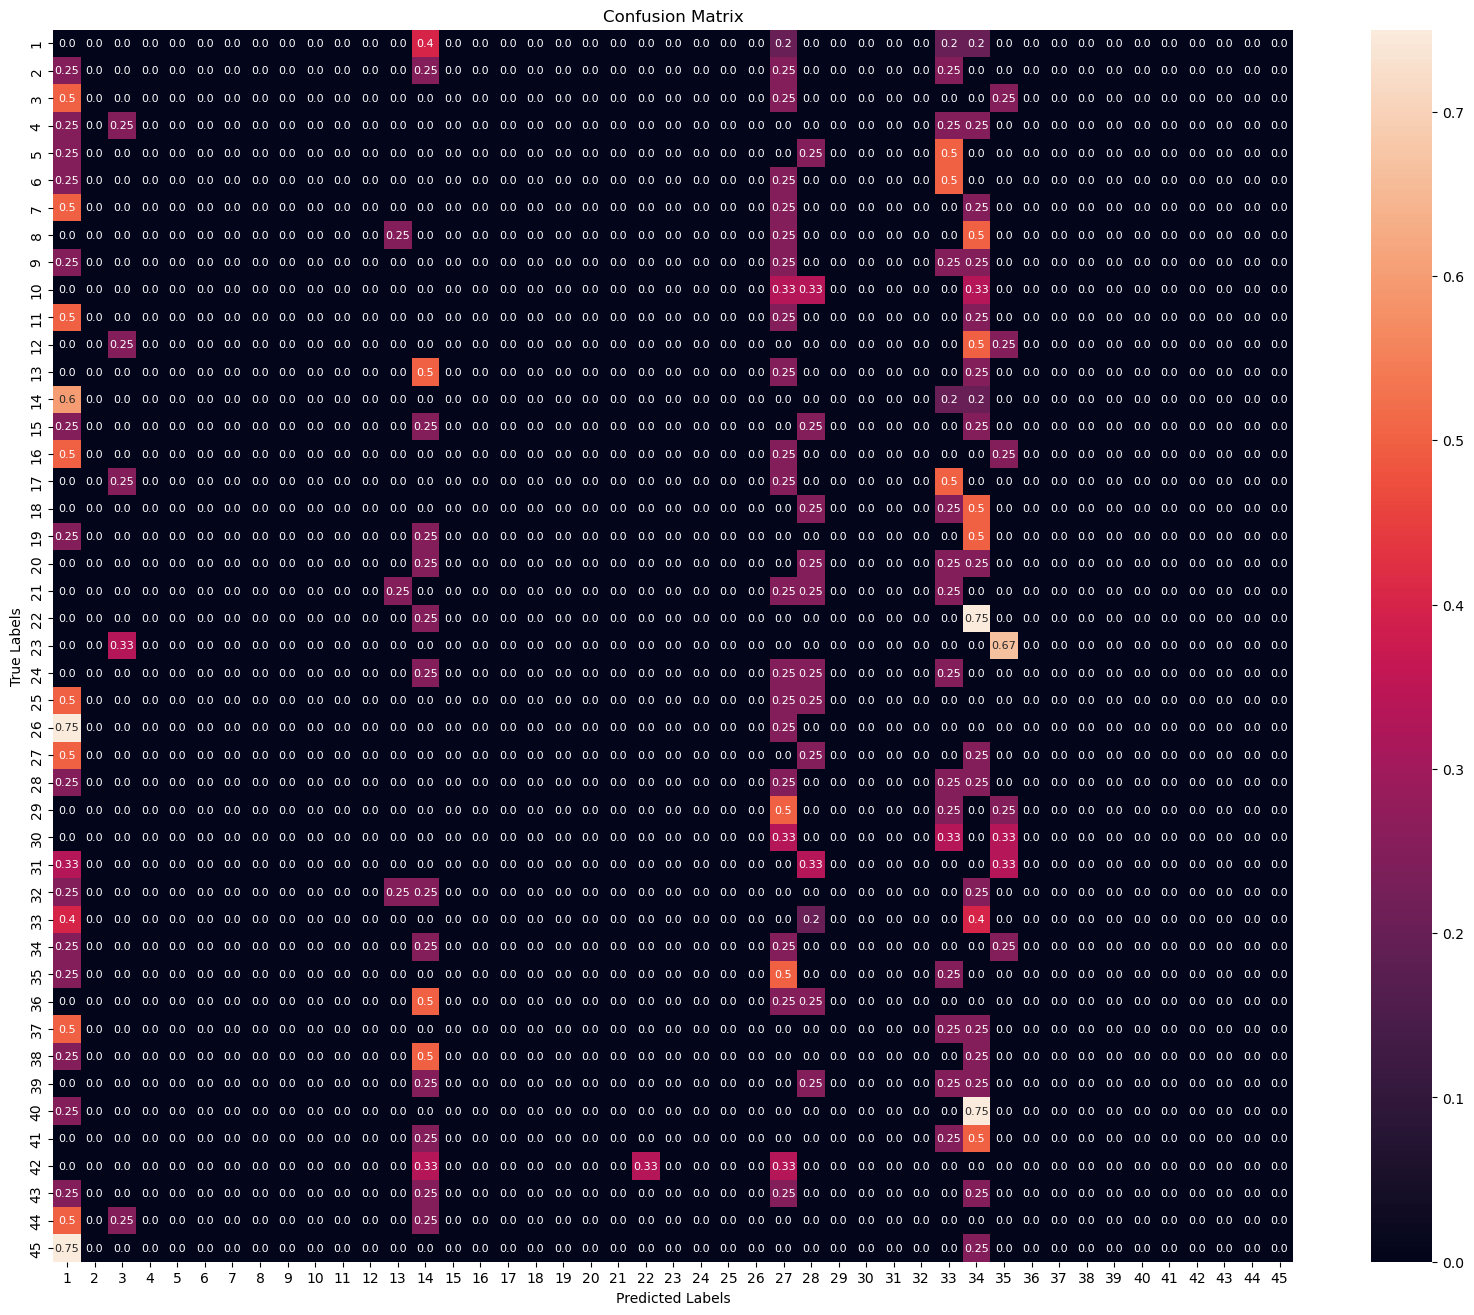

In [131]:
#%%
cm = confusion_matrix(np.array(test_labels), prediction_base, normalize='true', labels=svm_model_base.classes_)

plt.figure(figsize=(20, 16))
sns.heatmap(cm, fmt='.2', annot=True,annot_kws={"size": 8}, xticklabels=svm_model_base.classes_, yticklabels=svm_model_base.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


In [122]:
Acc_base= sum(np.array(test_labels) == prediction_base)/len(np.array(test_labels))*100

In [123]:
print(Acc_base)

0.0


In [65]:
file = open( os.path.join(NewDirectory,'Acc_base.txt'), 'w')
# Write content to the file
file.write(str(Acc_base))

18

In [66]:
Acc_base2 = balanced_accuracy_score(test_labels_array, prediction_base)
print(Acc_base2)

0.4278228715728716


C:\Users\ilkele4s\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [67]:
file = open( os.path.join(NewDirectory,'Acc_base2.txt'), 'w')
# Write content to the file
file.write(str(Acc_base2))

18

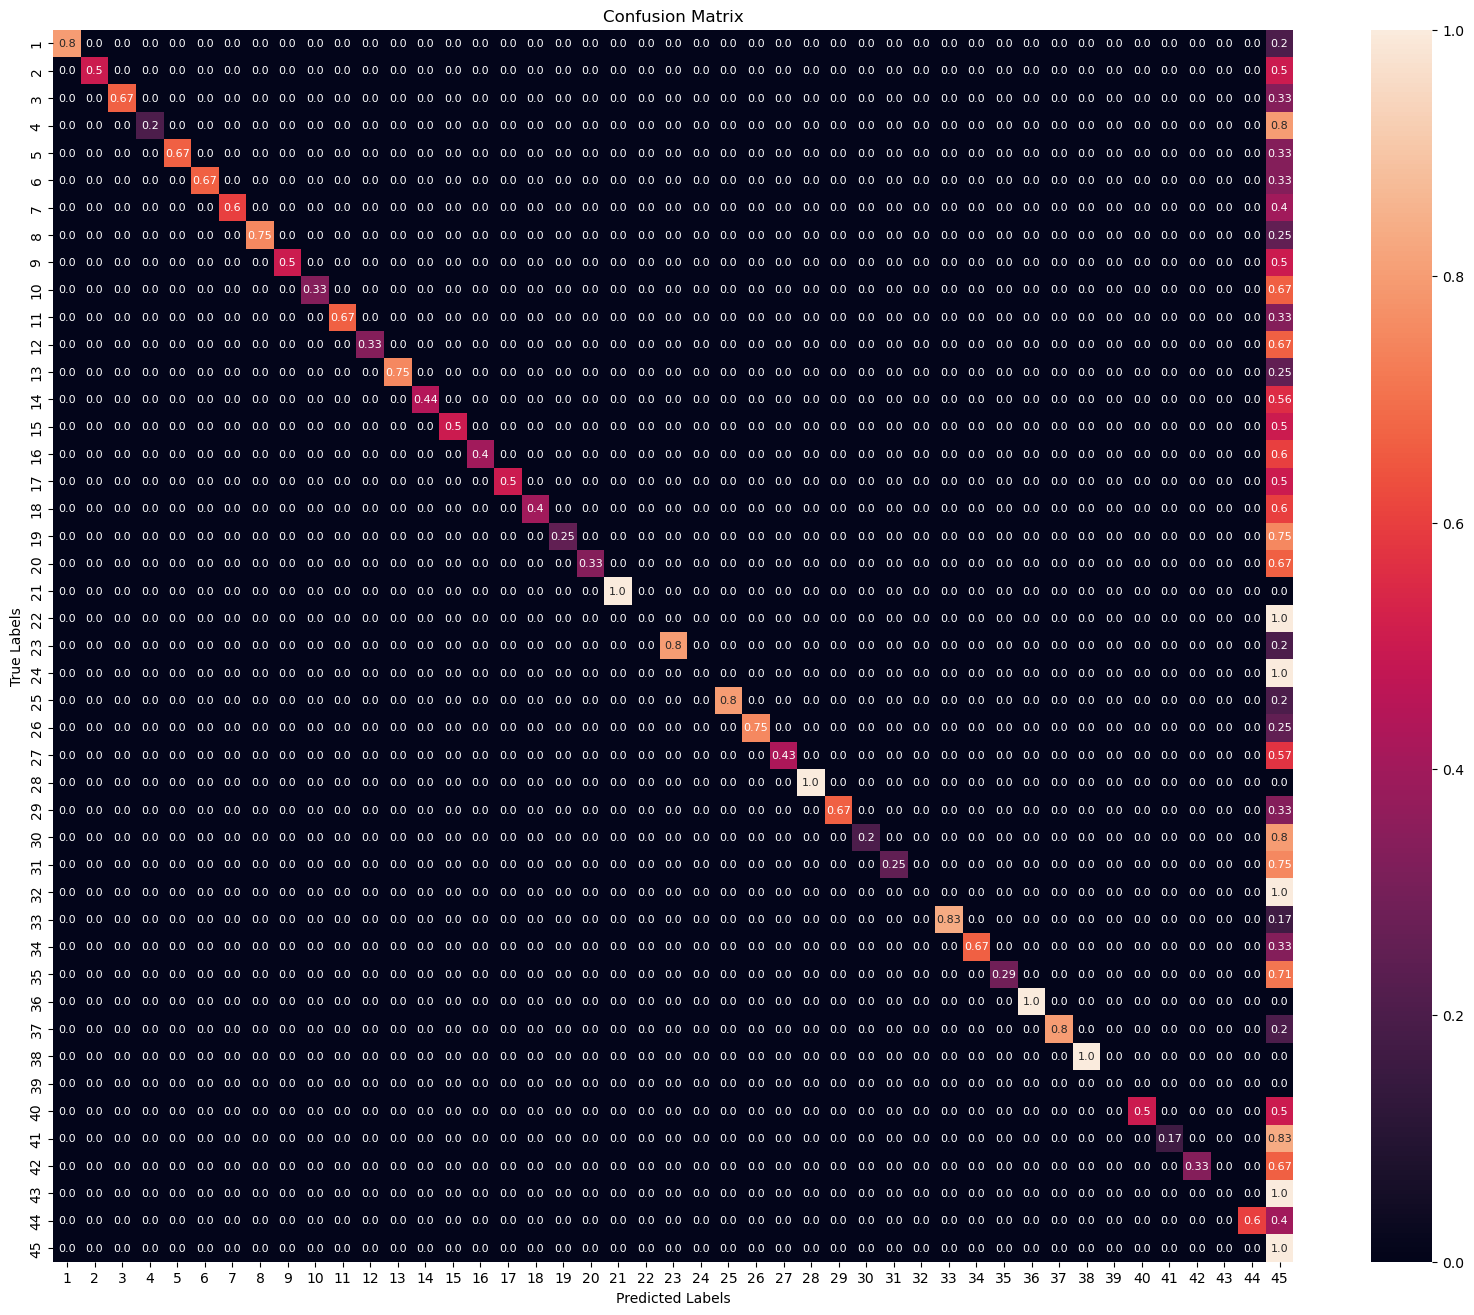

In [68]:
cm = confusion_matrix(test_labels_array, prediction_optimized, normalize='true', labels=svm_model_base.classes_)

plt.figure(figsize=(20, 16))
sns.heatmap(cm, fmt='.2', annot=True, annot_kws={"size": 8}, xticklabels=svm_model_base.classes_, yticklabels=svm_model_base.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.savefig(os.path.join(NewDirectory,'Cm_optim.png'))
plt.show()


In [69]:
Acc_optimized= sum(test_labels_array == prediction_optimized)/len(test_labels_array)*100
print(Acc_optimized)

51.41242937853108


In [70]:
file = open(os.path.join(NewDirectory,'Acc_optimized.txt'), 'w')
# Write content to the file
file.write(str(Acc_optimized))

17

In [71]:
Acc_optimized2 = balanced_accuracy_score(test_labels_array, prediction_optimized)
print(Acc_optimized2)

0.530501443001443


In [72]:
file = open(os.path.join(NewDirectory,'Acc_optimized2.txt'), 'w')
# Write content to the file
file.write(str(Acc_optimized2))

17

In [73]:
f1 = f1_score(test_labels_array, prediction_optimized, average='weighted')
print(f1)

0.6257542397557136


In [74]:
file = open(os.path.join(NewDirectory,'F1.txt'), 'w')
# Write content to the file
file.write(str(f1))

18

In [75]:
np.unique(test_labels_array) 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 40, 41, 42, 43, 44, 45])

In [76]:
np.unique(prediction_optimized)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37,
       38, 40, 41, 42, 44, 45])